### **AUC's Across Models And Datasets**

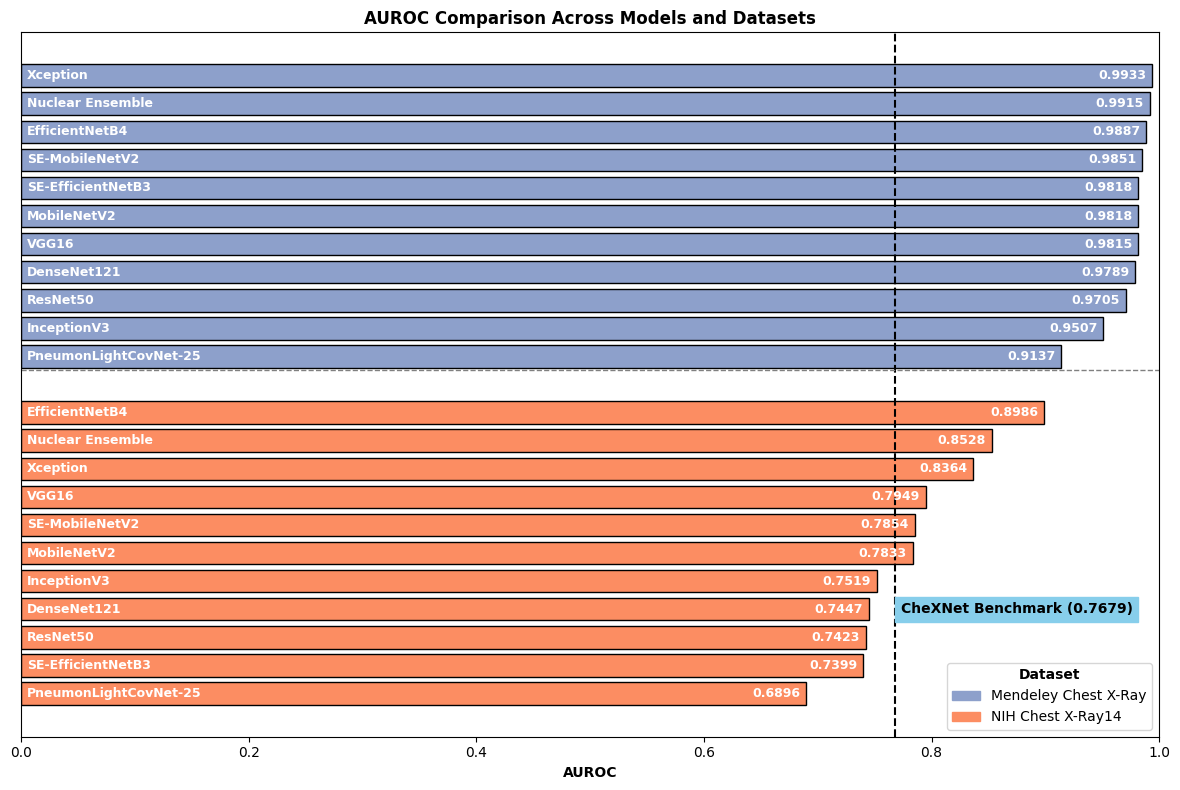

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data (AUROC values taken from the tables of each model)
data = [
    # Mendeley Chest X-Ray
    {"Dataset": "Mendeley Chest X-Ray", "Model": "PneumonLightCovNet-25",    "AUROC": 0.9137},
    {"Dataset": "Mendeley Chest X-Ray", "Model": "InceptionV3",              "AUROC": 0.9507},
    {"Dataset": "Mendeley Chest X-Ray", "Model": "ResNet50",                 "AUROC": 0.9705},
    {"Dataset": "Mendeley Chest X-Ray", "Model": "DenseNet121",              "AUROC": 0.9789},
    {"Dataset": "Mendeley Chest X-Ray", "Model": "VGG16",                    "AUROC": 0.9815},
    {"Dataset": "Mendeley Chest X-Ray", "Model": "SE-EfficientNetB3",        "AUROC": 0.9818},
    {"Dataset": "Mendeley Chest X-Ray", "Model": "MobileNetV2",              "AUROC": 0.9818},
    {"Dataset": "Mendeley Chest X-Ray", "Model": "SE-MobileNetV2",           "AUROC": 0.9851},
    {"Dataset": "Mendeley Chest X-Ray", "Model": "EfficientNetB4",           "AUROC": 0.9887},
    {"Dataset": "Mendeley Chest X-Ray", "Model": "Nuclear Ensemble",         "AUROC": 0.9915},
    {"Dataset": "Mendeley Chest X-Ray", "Model": "Xception",                 "AUROC": 0.9933},

    # NIH Chest X-Ray14
    {"Dataset": "NIH Chest X-Ray14",    "Model": "PneumonLightCovNet-25",    "AUROC": 0.6896},
    {"Dataset": "NIH Chest X-Ray14",    "Model": "SE-EfficientNetB3",        "AUROC": 0.7399},
    {"Dataset": "NIH Chest X-Ray14",    "Model": "ResNet50",                 "AUROC": 0.7423},
    {"Dataset": "NIH Chest X-Ray14",    "Model": "DenseNet121",              "AUROC": 0.7447},
    {"Dataset": "NIH Chest X-Ray14",    "Model": "InceptionV3",              "AUROC": 0.7519},
    {"Dataset": "NIH Chest X-Ray14",    "Model": "MobileNetV2",              "AUROC": 0.7833},
    {"Dataset": "NIH Chest X-Ray14",    "Model": "SE-MobileNetV2",           "AUROC": 0.7854},
    {"Dataset": "NIH Chest X-Ray14",    "Model": "VGG16",                    "AUROC": 0.7949},
    {"Dataset": "NIH Chest X-Ray14",    "Model": "Xception",                 "AUROC": 0.8364},
    {"Dataset": "NIH Chest X-Ray14",    "Model": "Nuclear Ensemble",         "AUROC": 0.8528},
    {"Dataset": "NIH Chest X-Ray14",    "Model": "EfficientNetB4",           "AUROC": 0.8986},
]

df = pd.DataFrame(data)

# Sort each group descending (highest -> lowest)
mendeley_df = df[df["Dataset"] == "Mendeley Chest X-Ray"].sort_values("AUROC", ascending=False)
nih_df = df[df["Dataset"] == "NIH Chest X-Ray14"].sort_values("AUROC", ascending=False)

# Compute y positions with a gap between groups (Mendeley on top visually)
y_positions = []
labels = []
aucs = []
ds_list = []
current_y = 0
gap = 1  # vertical gap between groups

for group_df, group_name in [(mendeley_df, "Mendeley Chest X-Ray"), (nih_df, "NIH Chest X-Ray14")]:
    for _, row in group_df.iterrows():
        y_positions.append(current_y)
        labels.append(row["Model"])
        aucs.append(row["AUROC"])
        ds_list.append(group_name)
        current_y += 1
    current_y += gap

# Plot setup
fig, ax = plt.subplots(figsize=(12, 8))
colors = {'Mendeley Chest X-Ray': '#8da0cb', 'NIH Chest X-Ray14': '#fc8d62'}  # Mendeley light blue; NIH orange
bar_colors = [colors[ds] for ds in ds_list]
ax.barh(y_positions, aucs, color=bar_colors, edgecolor='black')

# Model names and AUROC annotations
for y, auc, label in zip(y_positions, aucs, labels):
    ax.text(0.005, y, label, va='center', ha='left', color='white', fontsize=9, fontweight='bold')
    ax.text(auc - 0.005, y, f"{auc:.4f}", va='center', ha='right', color='white', fontsize=9, fontweight='bold')

# CheXNet benchmark line and labelled background (shift label slightly up)
benchmark = 0.7679
ax.axvline(benchmark, color='black', linestyle='--', linewidth=1.5)

# compute midpoint of NIH group and shift label upward by `shift_up` units
nih_indices = [i for i, ds in enumerate(ds_list) if ds == "NIH Chest X-Ray14"]
shift_up = -2  # reduce this to move less, increase to move more
if nih_indices:
    mid_idx = int(np.round(np.mean([y_positions[i] for i in nih_indices])))
    text_y = mid_idx - shift_up   # subtract to shift upward (visual)
    ax.text(benchmark + 0.005, text_y, f"CheXNet Benchmark ({benchmark:.4f})",
            va='center', ha='left', fontsize=10, fontweight='bold', backgroundcolor='skyblue')

# Divider between groups (after Mendeley)
divider_y = len(mendeley_df) - 0.5
ax.axhline(divider_y, color='gray', linestyle='--', linewidth=1)

# Invert y-axis so Mendeley group appears at the top
ax.invert_yaxis()

# Cleanup and labels
ax.set_yticks([])
ax.set_xlabel("AUROC", fontweight='bold')
ax.set_xlim(0, 1)
ax.set_title("AUROC Comparison Across Models and Datasets", fontweight='bold')

# Legend
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=colors[g]) for g in ["Mendeley Chest X-Ray", "NIH Chest X-Ray14"]]
leg = ax.legend(legend_patches, ["Mendeley Chest X-Ray", "NIH Chest X-Ray14"], title="Dataset", loc='lower right')
leg.get_title().set_fontweight('bold')

plt.tight_layout()
plt.show()

#### **Selected Model Performance: Original vs PT-PQ INT8 Quantised**

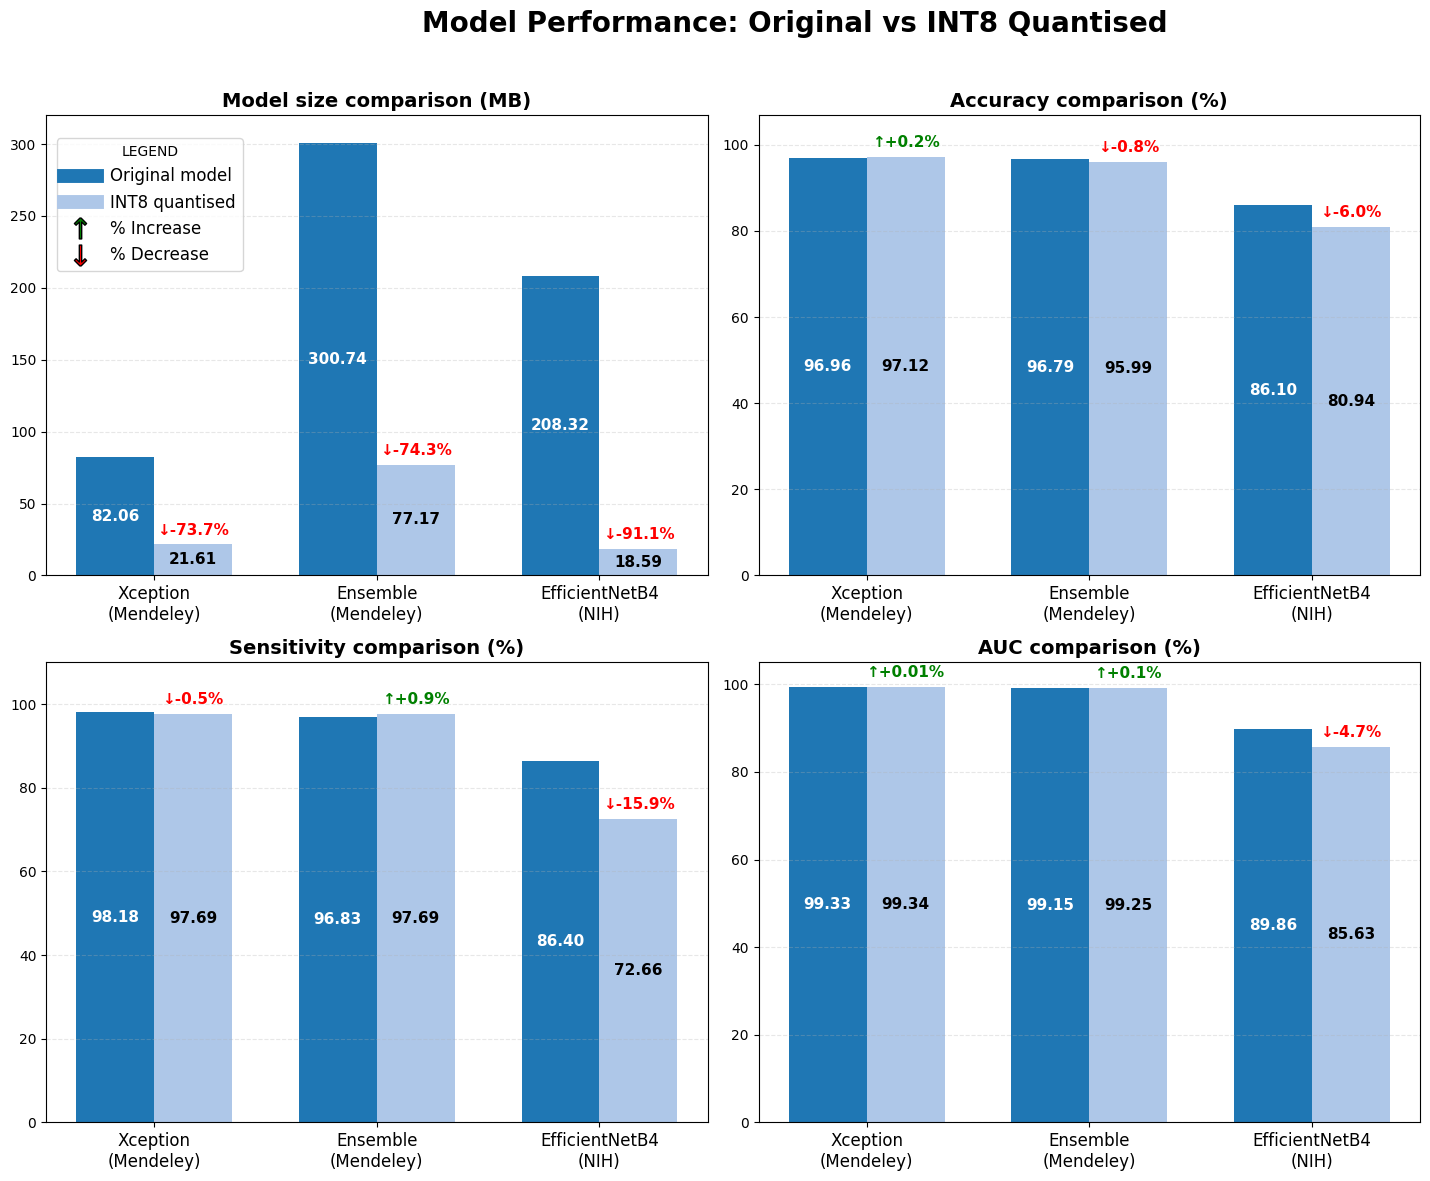

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# Data
data = {
    'Model': ['Xception\n(Mendeley)', 'Ensemble\n(Mendeley)', 'EfficientNetB4\n(NIH)'],
    'Original_Size':   [82.06,    300.74,    208.32],   # MB
    'Quantised_Size':  [21.61,     77.17,     18.59],
    'Original_Acc':    [96.96,     96.79,     86.10],   # %
    'Quantised_Acc':   [97.12,     95.99,     80.94],
    'Original_Sens':   [98.18,     96.83,     86.40],   # %
    'Quantised_Sens':  [97.69,     97.69,     72.66],
    'Original_AUC':    [99.33,     99.15,     89.86],   # %
    'Quantised_AUC':   [99.34,     99.25,     85.63],
}

df = pd.DataFrame(data)
# Compute % changes
for m in ['Size','Acc','Sens','AUC']:
    df[f'{m}_Change'] = ((df[f'Quantised_{m}'] - df[f'Original_{m}'])
                         / df[f'Original_{m}'] * 100)

# Plot setup
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axs = axes.ravel()
x = np.arange(len(df))
width = 0.35

# Colours
orig_col = '#1f77b4'   # deep
quant_col = '#aec7e8'  # light
inc_col = 'green'
dec_col = 'red'

def bar_pair(ax, orig_vals, quant_vals, title, ylim, change_vals):
    # Bars
    b1 = ax.bar(x - width/2, orig_vals,  width, label='Original model',  color=orig_col)
    b2 = ax.bar(x + width/2, quant_vals, width, label='INT8 quantised', color=quant_col)
    # Value labels inside bars
    for bar in b1:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h/2,
                f'{h:.2f}', ha='center', va='center',
                color='white', fontsize=11, fontweight='bold')
    for bar in b2:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h/2,
                f'{h:.2f}', ha='center', va='center',
                color='black', fontsize=11, fontweight='bold')
    # %-change annotations above quantised bars with arrows
    for idx, (xi, o, q, ch) in enumerate(zip(x + width/2, orig_vals, quant_vals, change_vals)):
        sign = '+' if ch >= 0 else ''
        col = inc_col if ch >= 0 else dec_col
        arrow = '↑' if ch >= 0 else '↓'
        # Two decimals for Xception's AUC (idx==0 when title contains 'AUC'), else one
        if 'AUC' in title and idx == 0:
            fmt = f'{arrow}{sign}{ch:.2f}%'
        else:
            fmt = f'{arrow}{sign}{ch:.1f}%'
        ax.text(xi, q + ylim*0.015,
                fmt, ha='center', va='bottom',
                color=col, fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylim(0, ylim)
    ax.set_xticks(x)
    ax.set_xticklabels(df['Model'], fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.3)

# 1. Size (0–400)
bar_pair(axs[0],
         df['Original_Size'], df['Quantised_Size'],
         'Model size comparison (MB)', 320,
         df['Size_Change'])

# 2. Accuracy (auto Y-limit ×1.1)
acc_ylim = df[['Original_Acc','Quantised_Acc']].values.max() * 1.1
bar_pair(axs[1],
         df['Original_Acc'], df['Quantised_Acc'],
         'Accuracy comparison (%)', acc_ylim,
         df['Acc_Change'])

# 3. Sensitivity (0–110)
bar_pair(axs[2],
         df['Original_Sens'], df['Quantised_Sens'],
         'Sensitivity comparison (%)', 110,
         df['Sens_Change'])

# 4. AUC (0–105)
bar_pair(axs[3],
         df['Original_AUC'], df['Quantised_AUC'],
         'AUC comparison (%)', 105,
         df['AUC_Change'])

# Create custom legend handles
handles = [
    Line2D([0], [0], color=orig_col, lw=10),
    Line2D([0], [0], color=quant_col, lw=10),
    Line2D([0], [0], marker=r'$\uparrow$', color='none', markerfacecolor=inc_col, markersize=15, linestyle='None'),
    Line2D([0], [0], marker=r'$\downarrow$', color='none', markerfacecolor=dec_col, markersize=15, linestyle='None'),
]
labels = ['Original model', 'INT8 quantised', '% Increase', '% Decrease']

# Single legend placed just outside on the right
fig.legend(handles, labels,
           loc='upper right', bbox_to_anchor=(0.16, 0.88),
           fontsize=12, title='LEGEND')

fig.suptitle('Model Performance: Original vs INT8 Quantised', fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 0.90, 0.96])
plt.show()